In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sparse
#from scipy.sparse.linalg import eigsh, expm_multiply, expm

In [21]:
import importlib

import sys
sys.path.append('/Users/Giovanni/Desktop/ResearchJob/Student-Research-Job/Chebyshev')
sys.path.append('/Users/Giovanni/Desktop/ResearchJob/Student-Research-Job/TCI')
sys.path.append("/home/t30/all/go56vod/Desktop/Student-Research-Job/Chebyshev")
sys.path.append("/home/t30/all/go56vod/Desktop/Student-Research-Job/TCI")


import ED_Cs_Lsites as ED
import Chebyshev as Cbs
import TCI_Lsite as TCI

importlib.reload(ED)
importlib.reload(Cbs)
importlib.reload(TCI)

<module 'TCI_Lsite' from '/Users/Giovanni/Desktop/ResearchJob/Student-Research-Job/TCI/TCI_Lsite.py'>

### Correlator generalized for L sites

In [22]:
# define Hamiltonian terms
L = 11
n = 11
dt = 1e-2
models = ['J = 1, g = 2 , Ising Model Ham. = H','J =1 g = 2 Ham. = H - k*Hzz', 'J = 1 g = 0.5, Ham. = H - h * Hxx', 'J = 1 g = 0.5, Ham. = H - k*Hzz - h*Hxx']
threshold = 30
N = 2**n
D = L

### TCI interpolation of 4 models

err_max:  0.0002599925641448202
err_2:  0.00017836668582418385
eval/D:  892

repeated evaluations:  1408
unique evaluations 892
unique + repeated:  2300
total evaluations:  2300



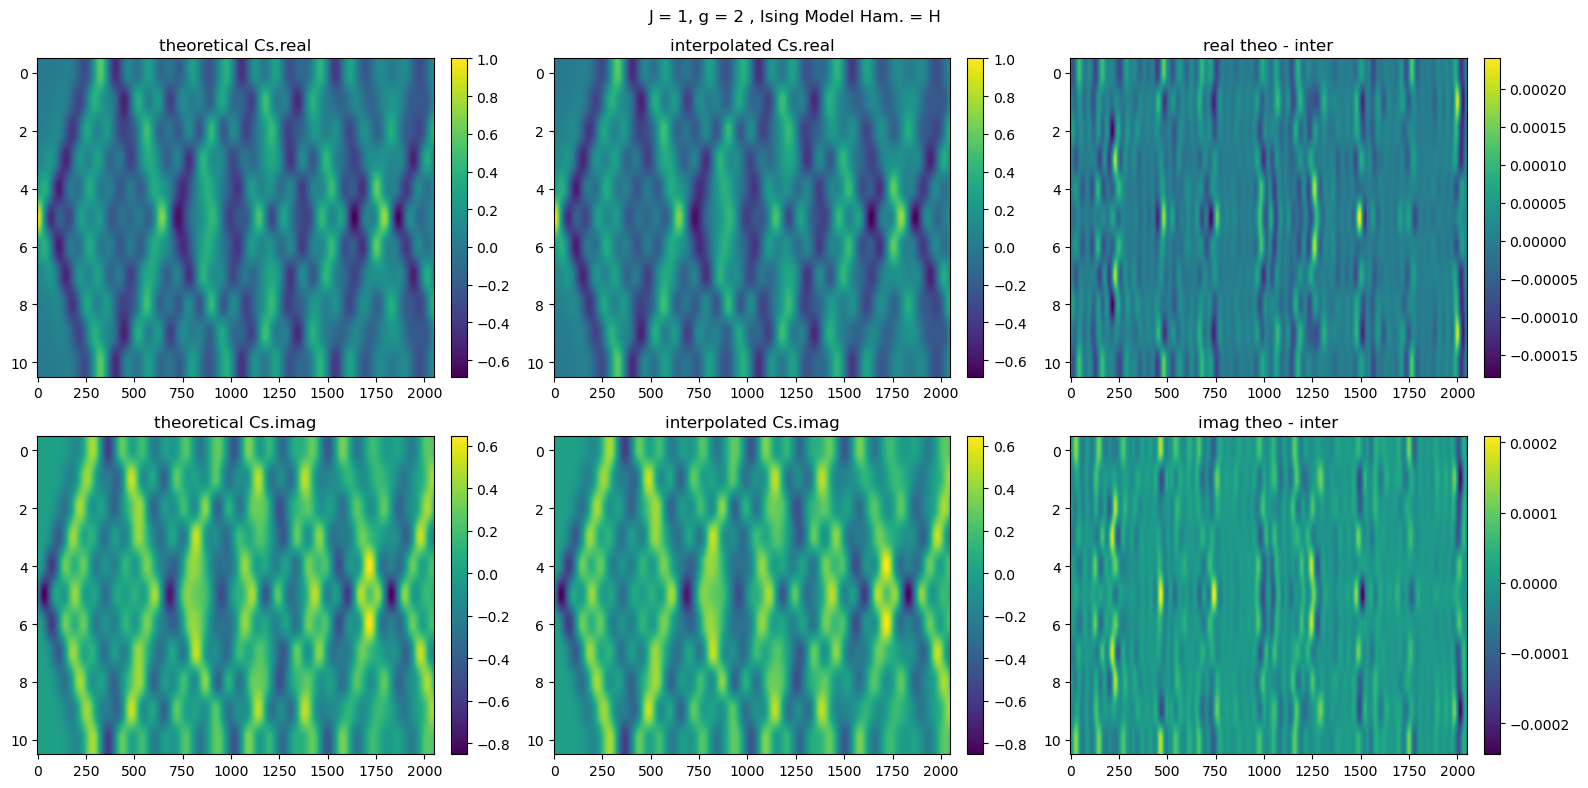

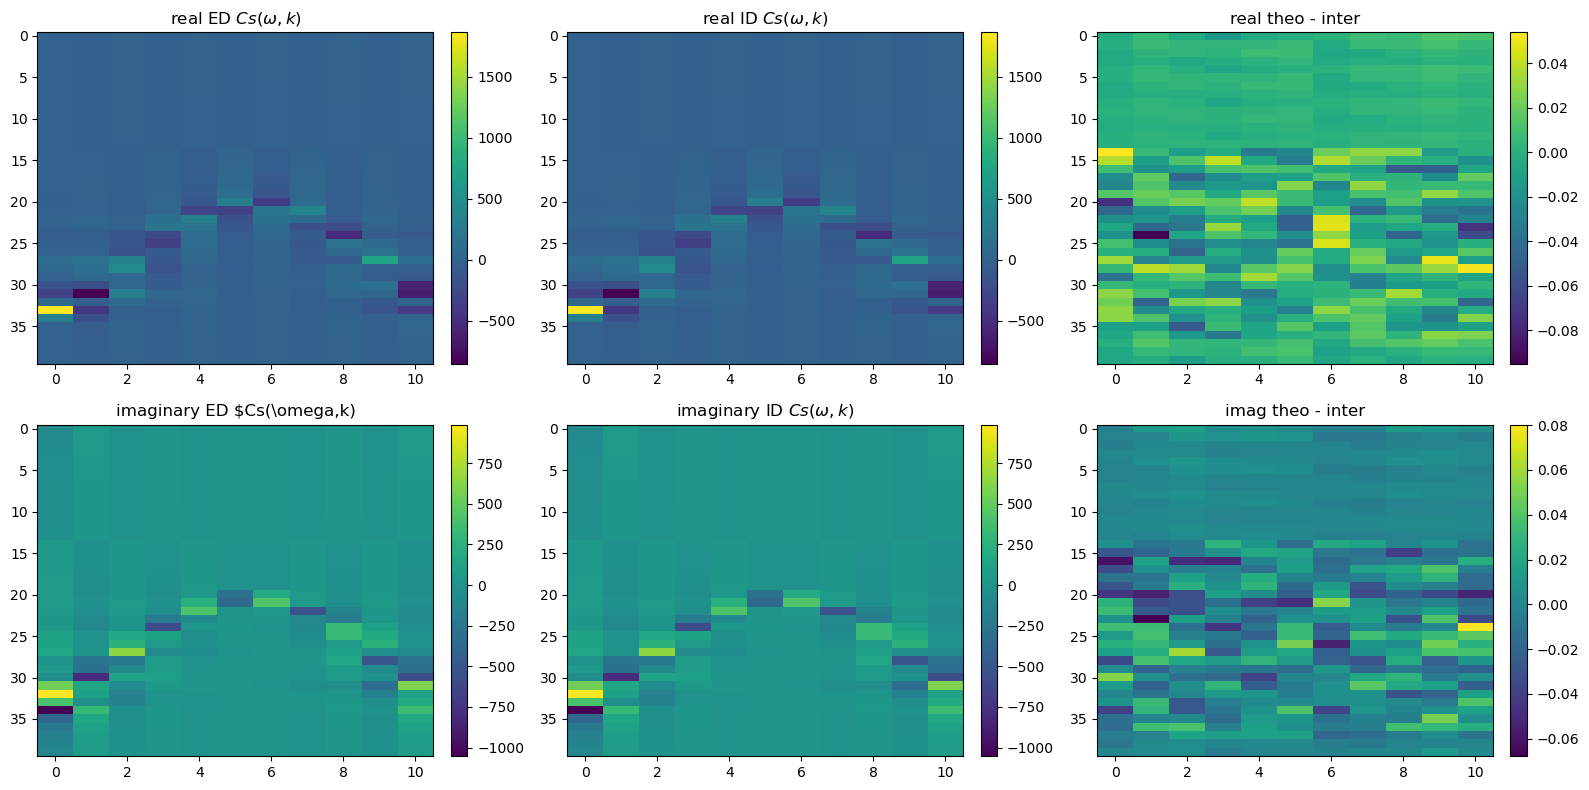

err_max:  0.00026887633932498004
err_2:  0.0001736392348943071
eval/D:  840

repeated evaluations:  1460
unique evaluations 840
unique + repeated:  2300
total evaluations:  2300



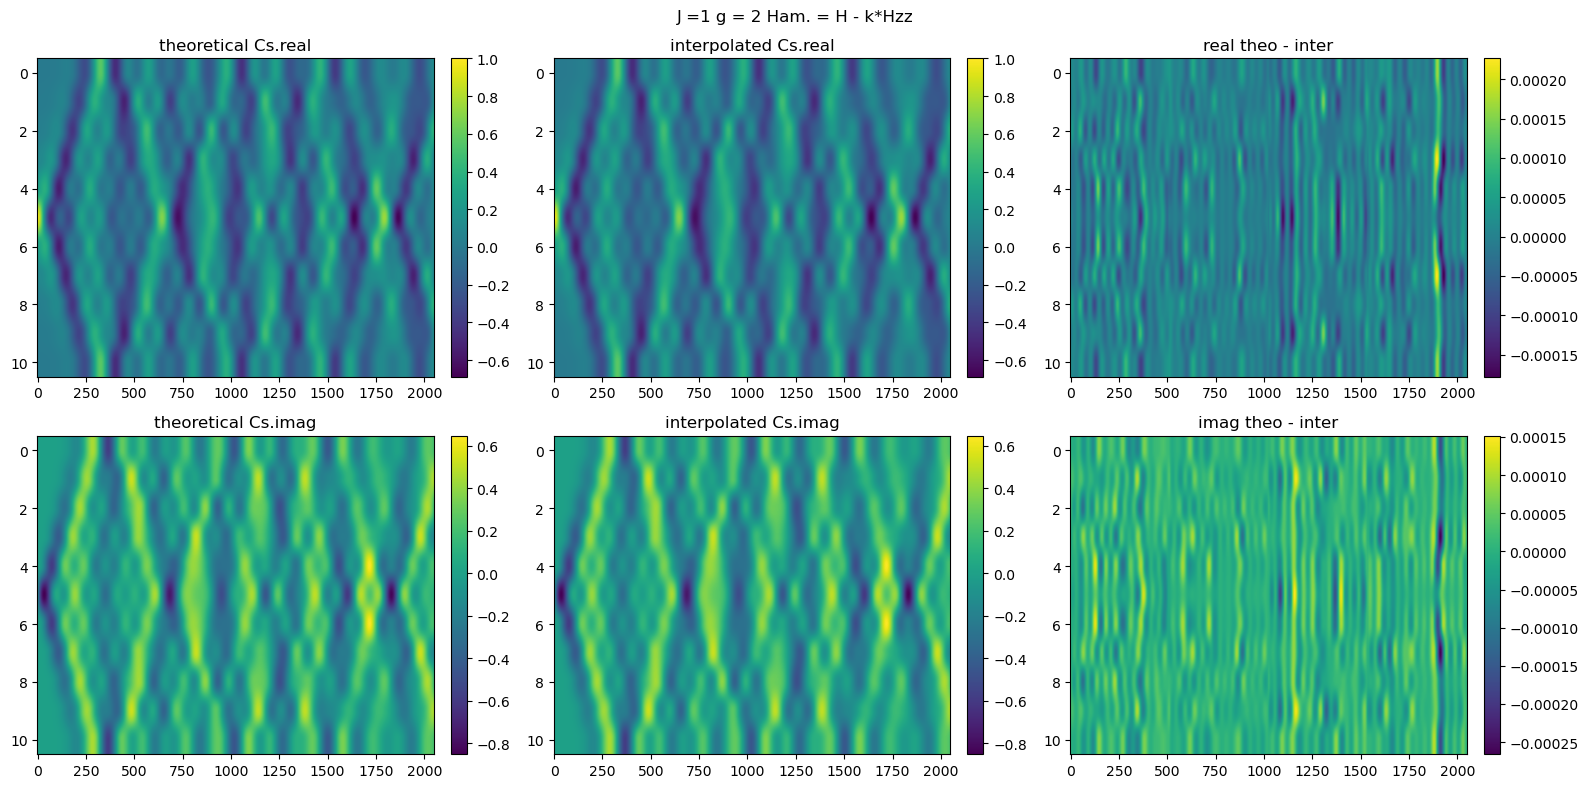

KeyboardInterrupt: 

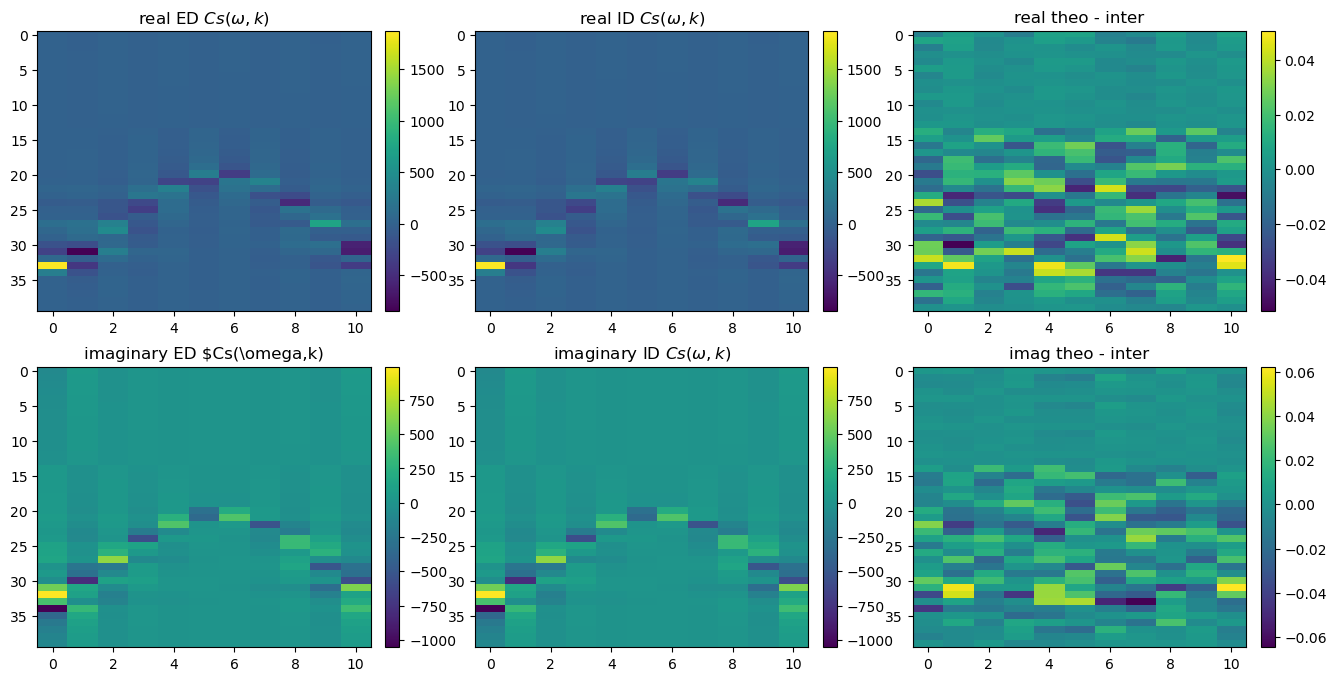

In [23]:
C = {}
for idx, model in enumerate(models):
    H = ED.gen_Ham(model = idx)
    Cs = ED.correlator(H= H, L = L, dt = dt,  n = n)
    C[f"Cs_{idx}"] = Cs

    func_vals = Cs.T #Cs is in the form (X,T)
    f_t = lambda *t: Cs.reshape((D,) + (2,) * n)[:,*t]
    func = TCI.function(f_t)

    As, _, eval, err_2, err_max, func_interp = TCI.tensor_cross_interpolation(func,         # function to be interpolated
                                    func_vals,    
                                    D,
                                    L=n,          # number of MPS tensors
                                    eps_or_chi=10, # bond dimension
                                    iters=1)       # number of back-and-forth sweeps
    rows, cols = 2, 3  # Define grid dimensions
    a, b = Cs.shape
    interp_Cs = func_interp.T.reshape(a, b)

    # Data and titles for each subplot
    data = [
        (Cs.real, 'theoretical Cs.real'),
        (np.real(interp_Cs), 'interpolated Cs.real'),
        (Cs.real - np.real(interp_Cs), 'real theo - inter'),
        (Cs.imag, 'theoretical Cs.imag'),
        (np.imag(interp_Cs), 'interpolated Cs.imag'),
        (Cs.imag - np.imag(interp_Cs), 'imag theo - inter')
    ]

    # Create subplots
    fig, axs = plt.subplots(rows, cols, figsize=(16, 8))

    # Loop through data and subplots
    for ax, (image, title) in zip(axs.flat, data):
        im = ax.imshow(image, aspect='auto', 
                        #interpolation='none'
                        )
        fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)  # Add colorbar
        ax.set_title(title)
    fig.suptitle(model)

    plt.tight_layout()
    plt.show()

    #here on we are doing Fourier Transform

    FTresult = ED.FT(Ct=Cs, t_list=np.arange(N)*dt, x_list = np.arange(D), nw=3)
    FTresult_i = ED.FT(Ct=interp_Cs, t_list=np.arange(N)*dt, x_list = np.arange(D), nw=3)


    FTresult = FTresult.T
    FTresult_i = FTresult_i.T


    # Discard rows where all elements are below the threshold
    rows_mask = np.any(np.abs(FTresult) >= threshold, axis=1)  # Check if any element in a row meets the threshold
    FTresult = FTresult[rows_mask, :]
    FTresult_i = FTresult_i[rows_mask, :]

    # Discard columns where all elements are below the threshold
    columns_mask = np.any(np.abs(FTresult) >= threshold, axis=0)  # Check if any element in a column meets the threshold
    FTresult = FTresult[:, columns_mask]
    FTresult_i = FTresult_i[:, columns_mask]



    # Data and titles for each subplot
    data = [
        (np.real(FTresult), r'real ED $Cs(\omega,k)$'),
        (np.real(FTresult_i), r'real ID $Cs(\omega,k)$'),
        (np.real(FTresult) - np.real(FTresult_i), 'real theo - inter'),
        (np.imag(FTresult), r'imaginary ED $Cs(\omega,k)'),
        (np.imag(FTresult_i), r'imaginary ID $Cs(\omega,k)$'),
        (np.imag(FTresult) - np.imag(FTresult_i), 'imag theo - inter')
    ]

    # Create subplots
    fig, axs = plt.subplots(rows, cols, figsize=(16, 8))

    # Loop through data and subplots
    for ax, (image, title) in zip(axs.flat, data):
        im = ax.imshow(image, aspect='auto', interpolation='none')
        fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)  # Add colorbar
        ax.set_title(title)

    plt.tight_layout()
    plt.show()




### Interpolation with Chebyshev

In [ ]:
L = 11
dt = 1e-2
n = 11
chi = 50
N = 2**n
D = L
models = ['J = 1, g = 2 , Ising Model Ham. = H','J =1 g = 2 Ham. = H - k*Hzz', 'J = 1 g = 0.5, Ham. = H - h * Hxx', 'J = 1 g = 0.5, Ham. = H - k*Hzz - h*Hxx']
threshold = 30


chi:  50
err_2:  0.00033663659322465746
err_max:  0.0007972601724161114
evaluations:  1100


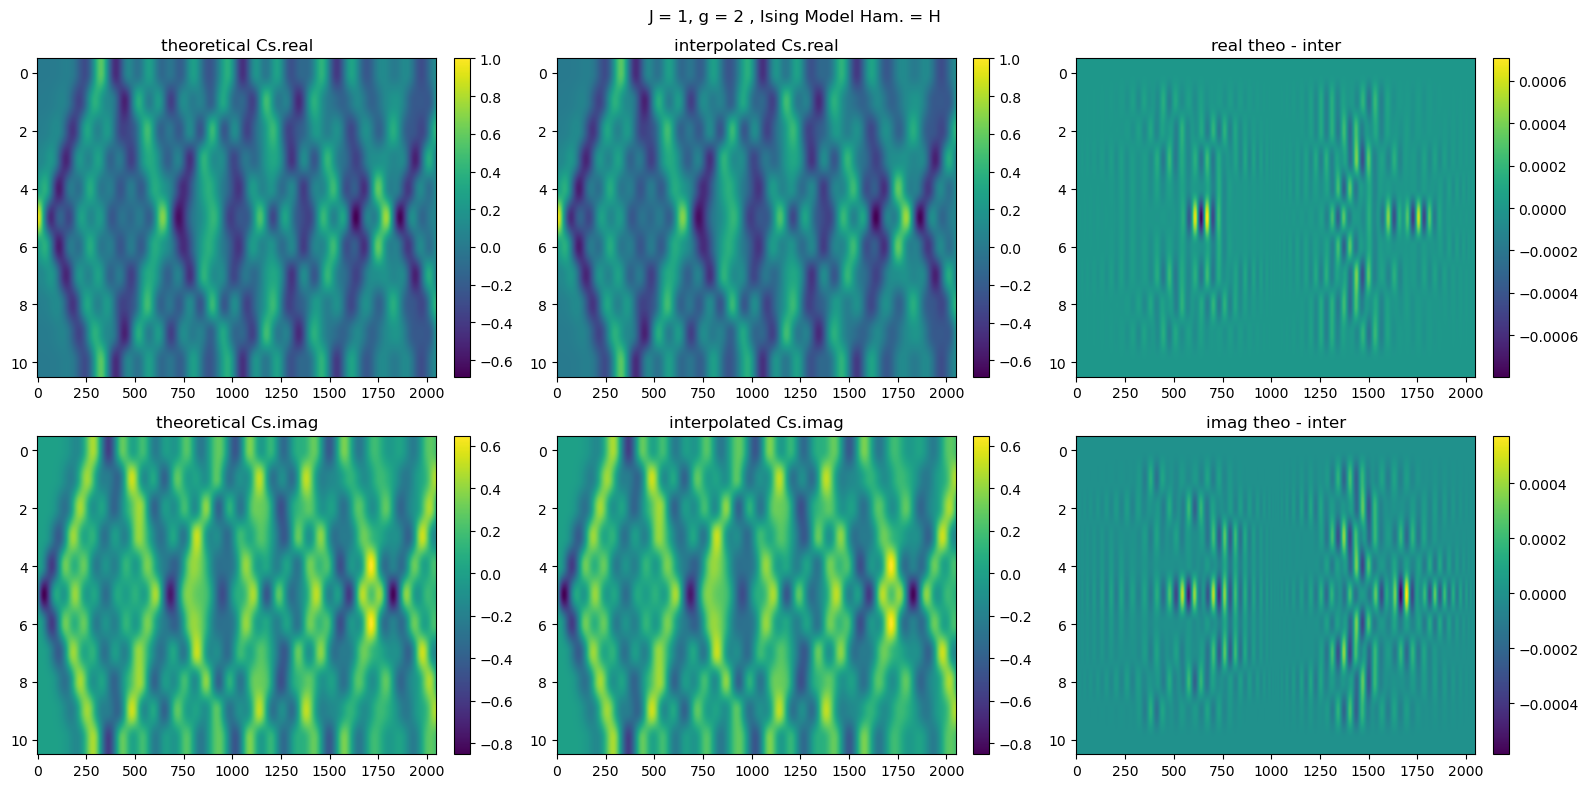

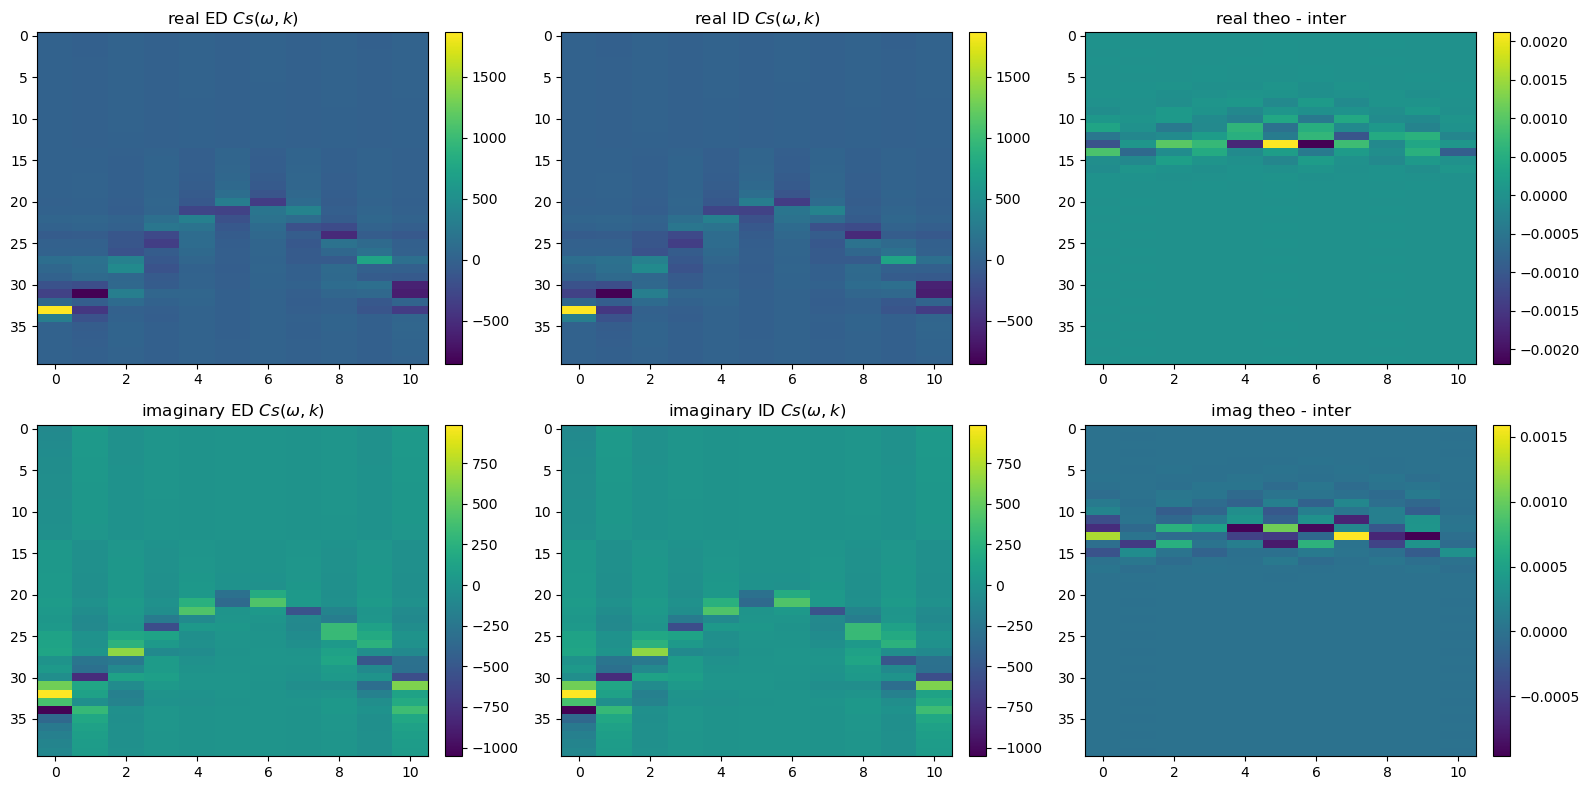

err_2:  0.00033663659323609525
err_max:  0.0007972601724658256
evaluations:  1100


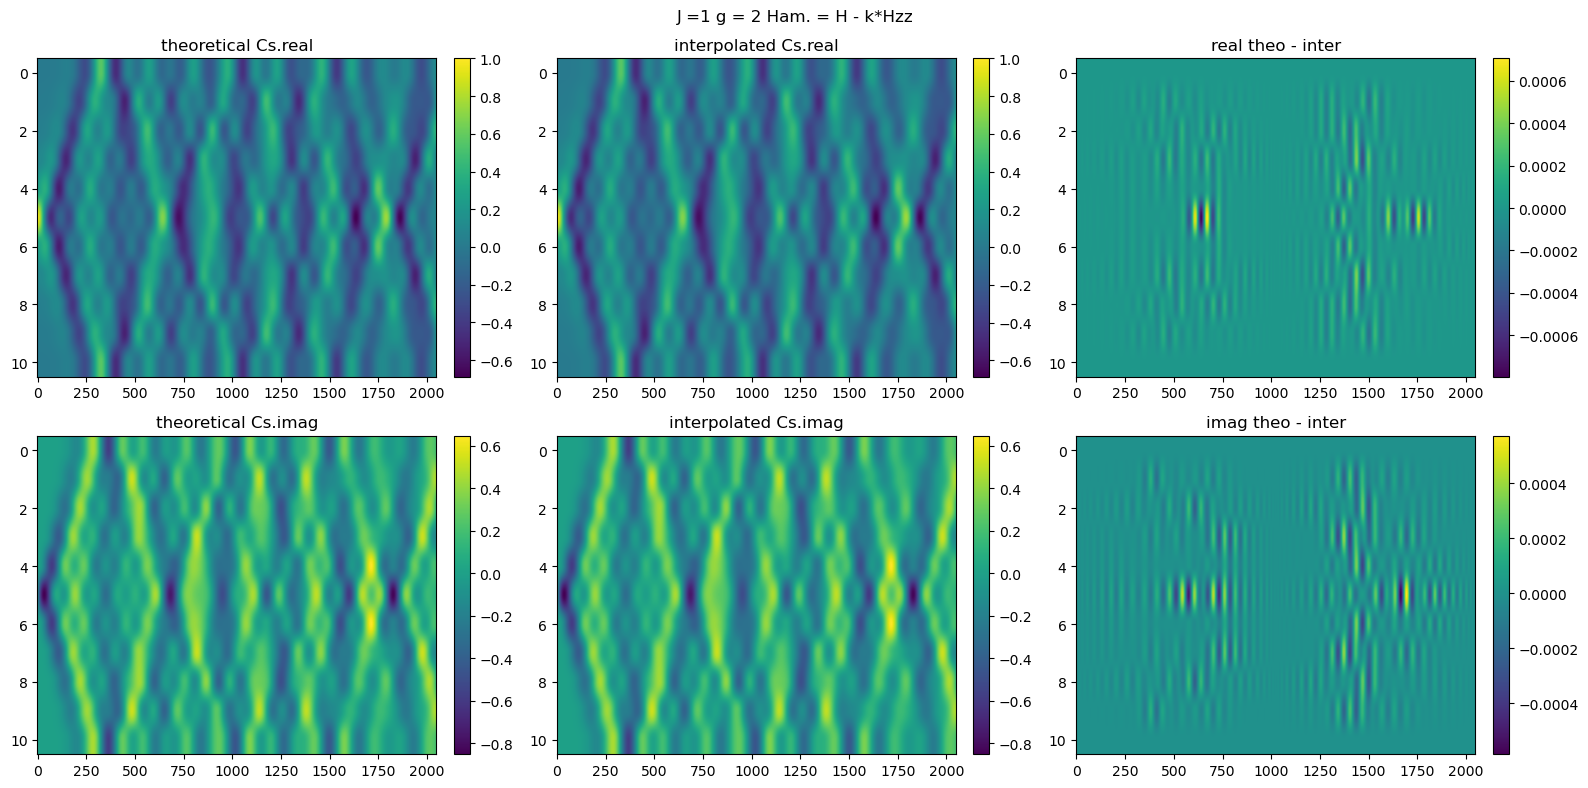

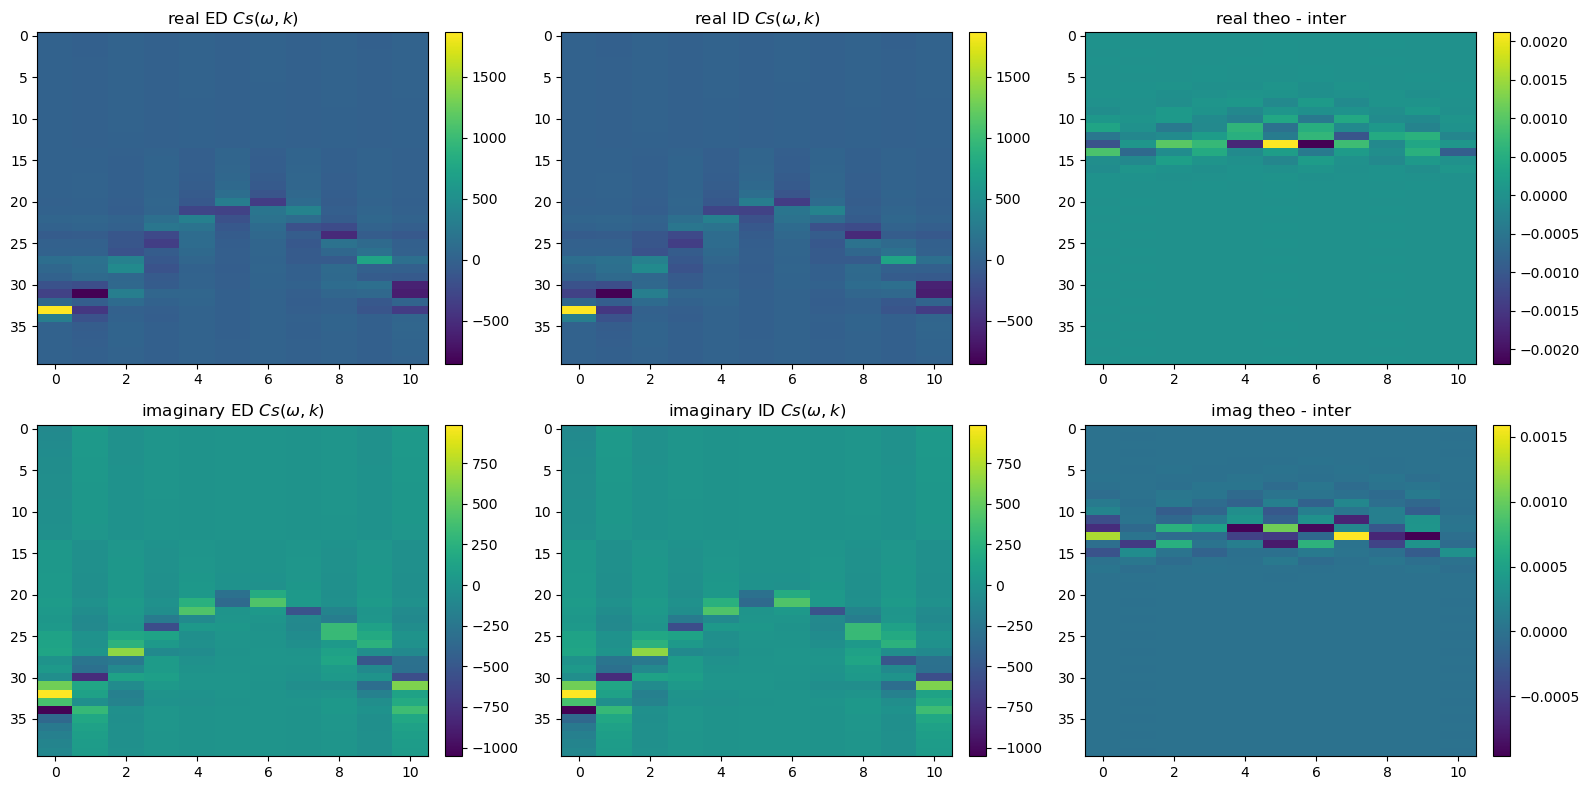

err_2:  0.14095577039945986
err_max:  0.1861091477378937
evaluations:  1100


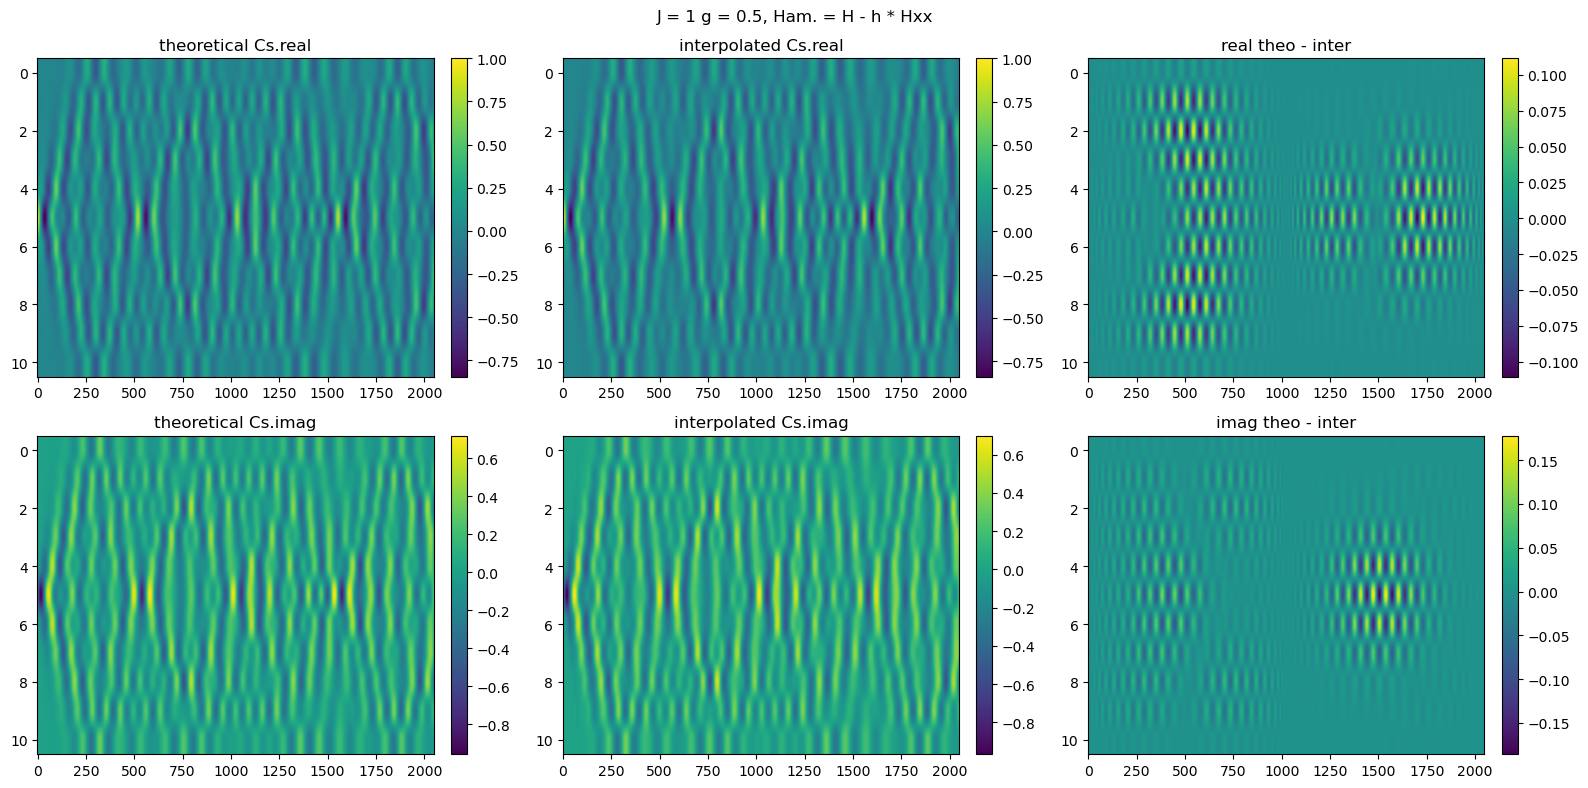

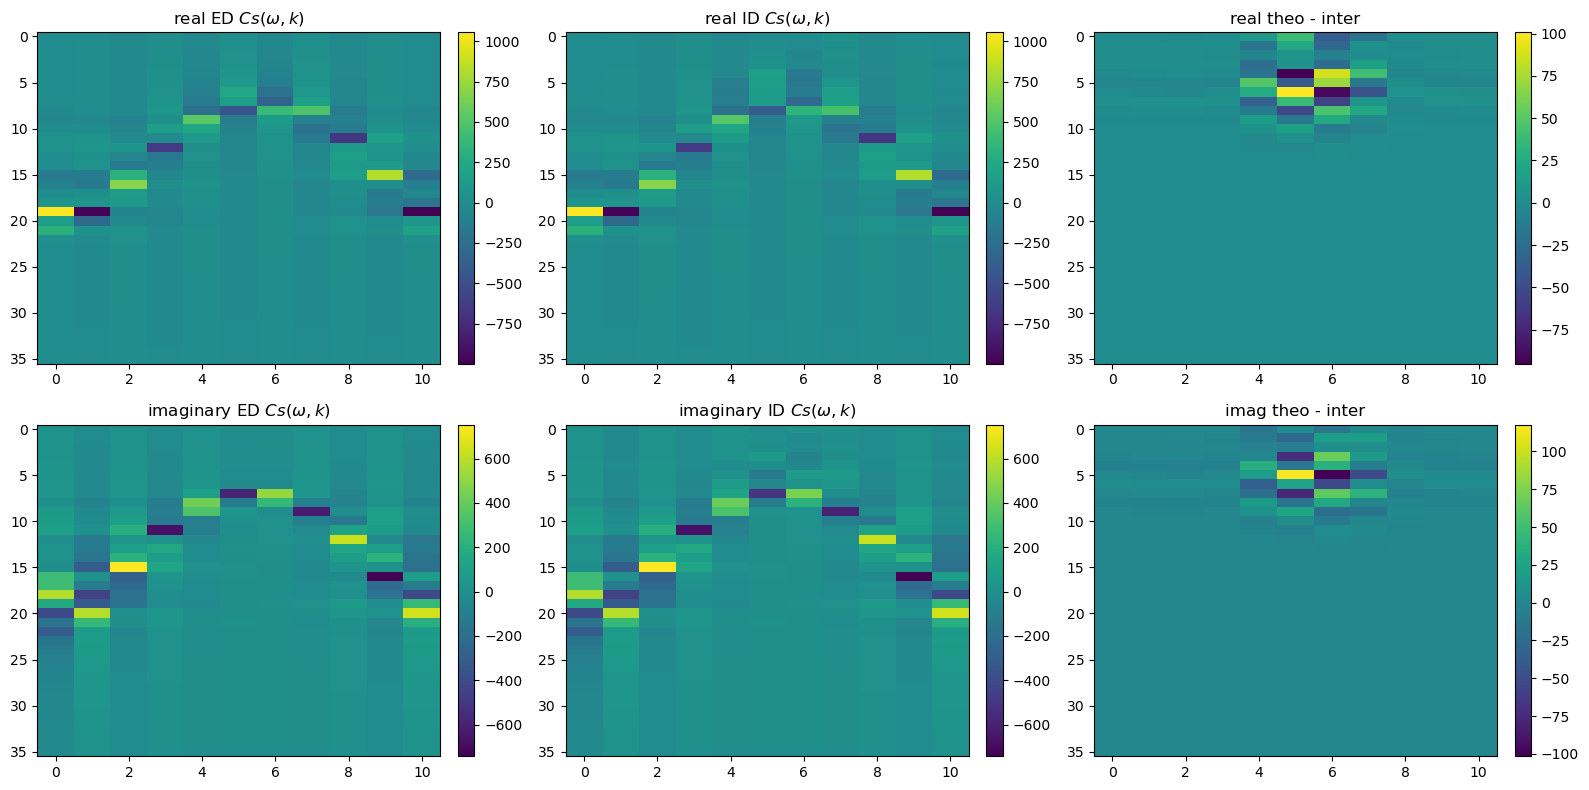

err_2:  0.00033663918261285074
err_max:  0.0007972850998963529
evaluations:  1100


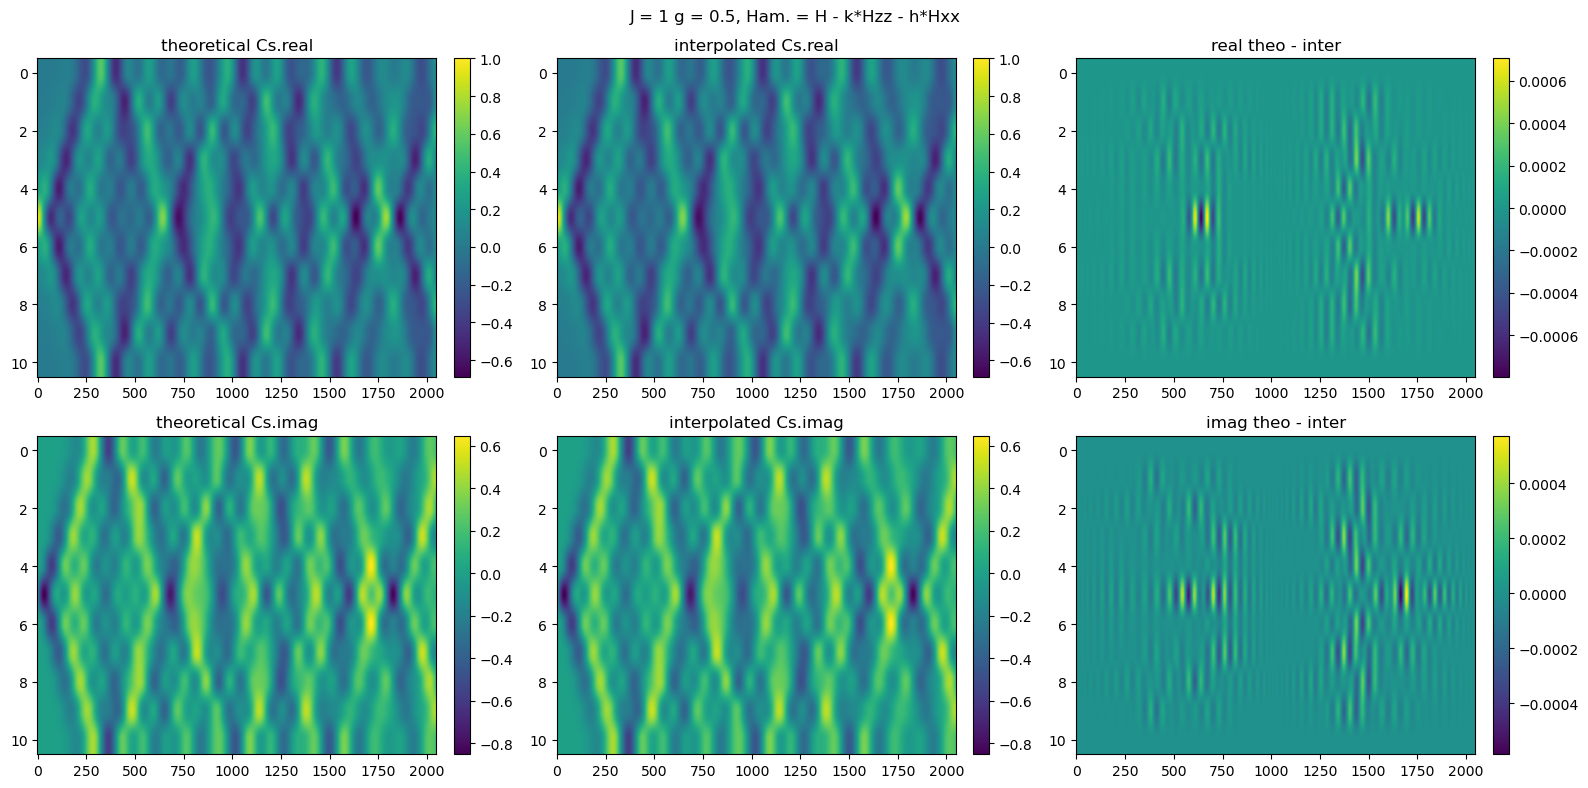

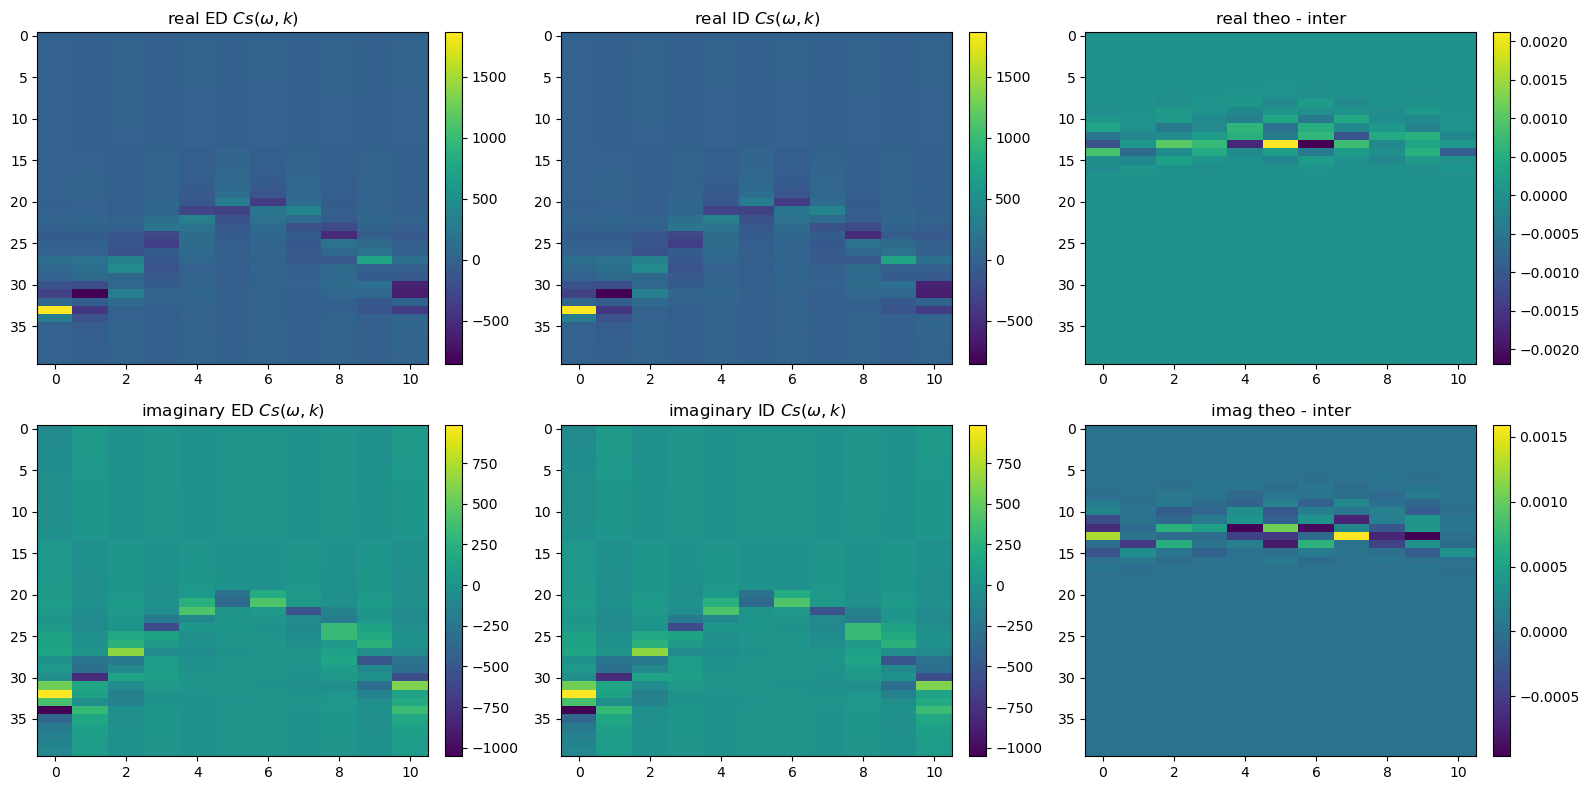

In [ ]:

print("chi: ", chi)

#func = lambda: ED.correlator_Chebyshev(H=H, dt=dt, n=n, D_list=D_list, t_matrix=t_matrix)
def func(D_list, t_matrix):
    return ED.correlator_Chebyshev(H=H, dt=dt, n=n, D_list=D_list, t_matrix=t_matrix)

for idx, model in enumerate(models):
    H = ED.gen_Ham(model = idx)
    #Cs = C[f"Cs_{idx}"]
    Cs = ED.correlator(H= H, L = L, dt = dt,  n = n)
    func_vals = Cs.T #Cs is in the form (X,T)
    # get MPS from Chebyshev interpolation
    As, evals, err_max, err_2, func_interp = Cbs.Chebyshev_interpolation_Dsite(func, # function to be interpolated
                                    func_vals,
                                    L=n,              # number of MPS tensors
                                    D = D,
                                    chi=chi)           # (half of the) bond dimension

    print("err_2: ", err_2)
    print("err_max: ", err_max)
    print("evaluations: ", evals)

    rows, cols = 2, 3  # Define grid dimensions
    a, b = Cs.shape
    interp_Cs = func_interp.T.reshape(a, b)

    # Data and titles for each subplot
    data = [
        (Cs.real, 'theoretical Cs.real'),
        (np.real(interp_Cs), 'interpolated Cs.real'),
        (Cs.real - np.real(interp_Cs), 'real theo - inter'),
        (Cs.imag, 'theoretical Cs.imag'),
        (np.imag(interp_Cs), 'interpolated Cs.imag'),
        (Cs.imag - np.imag(interp_Cs), 'imag theo - inter')
    ]

    # Create subplots
    fig, axs = plt.subplots(rows, cols, figsize=(16, 8))

    # Loop through data and subplots
    for ax, (image, title) in zip(axs.flat, data):
        im = ax.imshow(image, aspect='auto', 
                        #interpolation='none'
                        )
        fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)  # Add colorbar
        ax.set_title(title)
    fig.suptitle(model)

    plt.tight_layout()
    plt.show()



    #here on we are doing Fourier Transform

    FTresult = ED.FT(Ct=Cs, t_list=np.arange(N)*dt, x_list = np.arange(D), nw=3)
    FTresult_i = ED.FT(Ct=interp_Cs, t_list=np.arange(N)*dt, x_list = np.arange(D), nw=3)


    FTresult = FTresult.T
    FTresult_i = FTresult_i.T


    # Discard rows where all elements are below the threshold
    # rows_mask = np.any(np.abs(FTresult) >= threshold, axis=1)  # Check if any element in a row meets the threshold
    # FTresult = FTresult[rows_mask, :]
    # FTresult_i = FTresult_i[rows_mask, :]

    # # Discard columns where all elements are below the threshold
    # columns_mask = np.any(np.abs(FTresult) >= threshold, axis=0)  # Check if any element in a column meets the threshold
    # FTresult = FTresult[:, columns_mask]
    # FTresult_i = FTresult_i[:, columns_mask]



    # Data and titles for each subplot
    data = [
        (np.real(FTresult), r'real ED $Cs(\omega,k)$'),
        (np.real(FTresult_i), r'real ID $Cs(\omega,k)$'),
        (np.real(FTresult) - np.real(FTresult_i), 'real theo - inter'),
        (np.imag(FTresult), r'imaginary ED $Cs(\omega,k)$'),
        (np.imag(FTresult_i), r'imaginary ID $Cs(\omega,k)$'),
        (np.imag(FTresult) - np.imag(FTresult_i), 'imag theo - inter')
    ]

    # Create subplots
    fig, axs = plt.subplots(rows, cols, figsize=(16, 8))

    # Loop through data and subplots
    for ax, (image, title) in zip(axs.flat, data):
        im = ax.imshow(image, aspect='auto', interpolation='none')
        fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)  # Add colorbar
        ax.set_title(title)

    plt.tight_layout()
    plt.show()




# exact function values
#xs = np.linspace(0, N*dt, 2**n, endpoint=False)
#ts = np.arange(N)*dt